#Домашнє завдання до Теми 9. Задачі оптимізації

Цільова фуекція та система рівнянь:
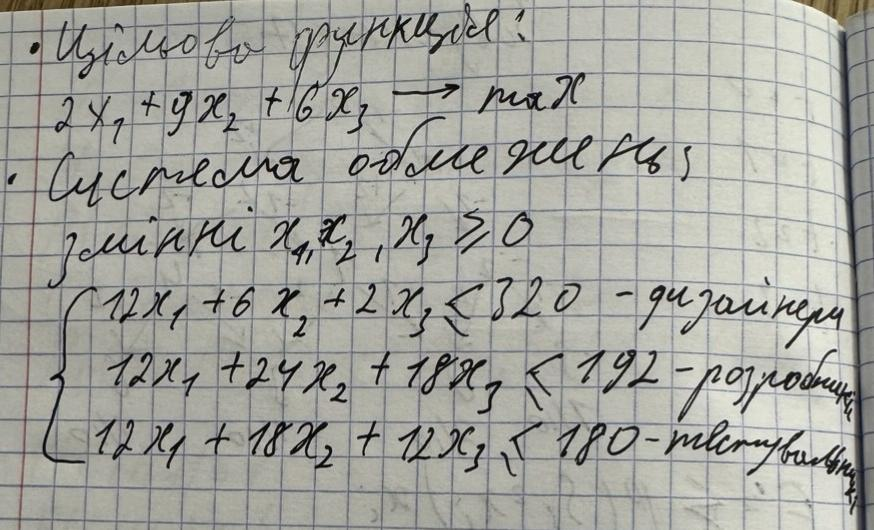

Оптимальний розподіл послуг:
Сайти: 0.00
Інтернет-магазини: 8.00
Інтеграція з ERP: 0.00
Сумарний місячний дохід: 72.00 тисяч $


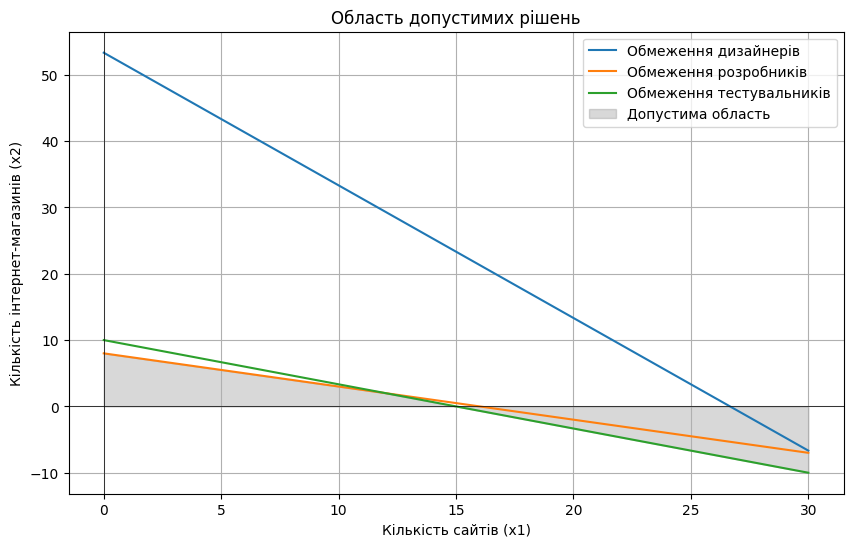

In [1]:
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import numpy as np

profit = [2, 9, 6]

designers_time = [12, 6, 2]
developers_time = [12, 24, 18]
testers_time = [12, 18, 12]

max_designers_hours = 2 * 160
max_developers_hours = 192
max_testers_hours = 180

# Система обмежень
lhs_ineq = [
    designers_time,
    developers_time,
    testers_time
]

rhs_ineq = [
    max_designers_hours,
    max_developers_hours,
    max_testers_hours
]

bounds = [(0, None), (0, None), (0, None)]

# Цільова функція
result = linprog(c=[-p for p in profit], A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bounds, method="highs")

optimal_services = result.x
total_profit = -result.fun

# оптимальний розподіл послуг та сумарний місячний дохід:
print("Оптимальний розподіл послуг:")
print(f"Сайти: {optimal_services[0]:.2f}")
print(f"Інтернет-магазини: {optimal_services[1]:.2f}")
print(f"Інтеграція з ERP: {optimal_services[2]:.2f}")
print(f"Сумарний місячний дохід: {total_profit:.2f} тисяч $")

x1 = np.linspace(0, 30, 300)

x2_designers = (max_designers_hours - 12 * x1) / 6
x2_developers = (max_developers_hours - 12 * x1) / 24
x2_testers = (max_testers_hours - 12 * x1) / 18

plt.figure(figsize=(10, 6))
plt.plot(x1, x2_designers, label="Обмеження дизайнерів")
plt.plot(x1, x2_developers, label="Обмеження розробників")
plt.plot(x1, x2_testers, label="Обмеження тестувальників")

plt.fill_between(x1, 0, np.minimum(np.minimum(x2_designers, x2_developers), x2_testers), color="grey", alpha=0.3, label="Допустима область")

# Графік
plt.xlabel("Кількість сайтів (x1)")
plt.ylabel("Кількість інтернет-магазинів (x2)")
plt.title("Область допустимих рішень")
plt.axhline(0, color="black",linewidth=0.5)
plt.axvline(0, color="black",linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

#Висновки

- Компанії вигідніше максимально використовувати свої ресурси для створення інтернет-магазинів, адже цей вид послуг приносить найбільший дохід із доступних ресурсів.
- Послуги з розробки сайтів та інтеграції з ERP неефективні в даних умовах через низький прибуток або значні витрати часу на їх виконання.